# Model Validation

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Model Capacity

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [4]:
# y=electricity, x=surface_area
Elec.head() 

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


### 산점도 (surface_area vs. electircity)

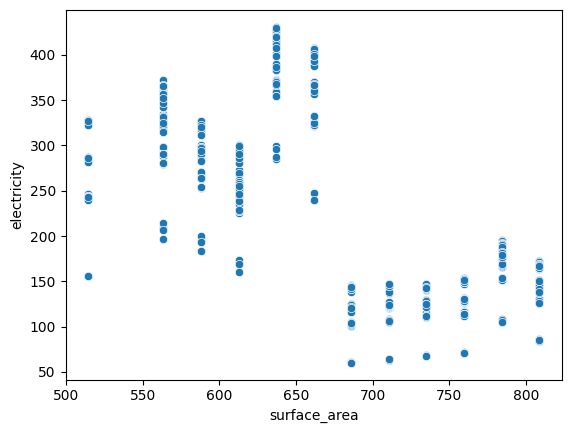

In [5]:
sns.scatterplot(x = Elec['surface_area'], y = Elec['electricity'])
plt.show()

### 1차 모델 시각화

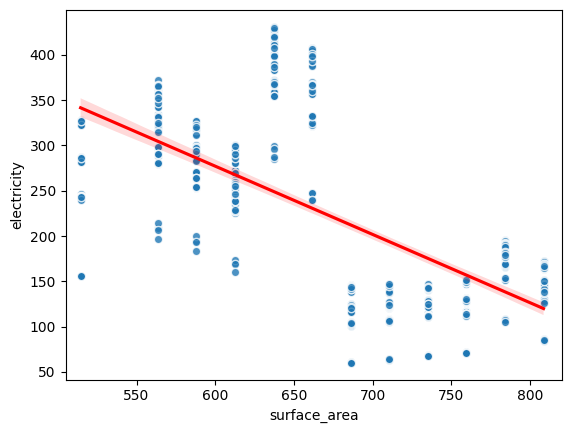

In [6]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'red'},
            scatter_kws = {'edgecolor' : 'white'})
plt.xlim(505, 820)
plt.show()

### 2차 모델 시각화

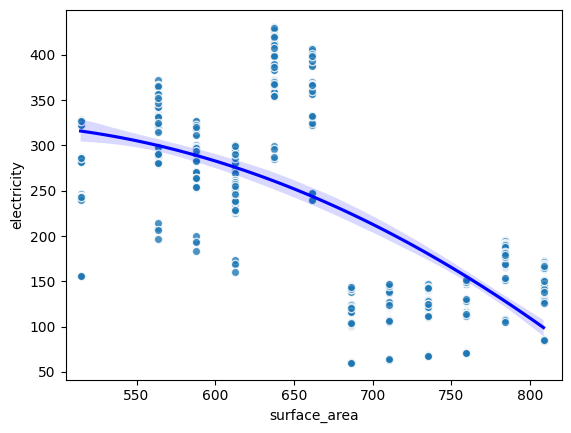

In [7]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'blue'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 2) # order 다항식 회귀식을 위한 항의 개수
plt.xlim(505, 820)
plt.show()

### 5차 모델 시각화

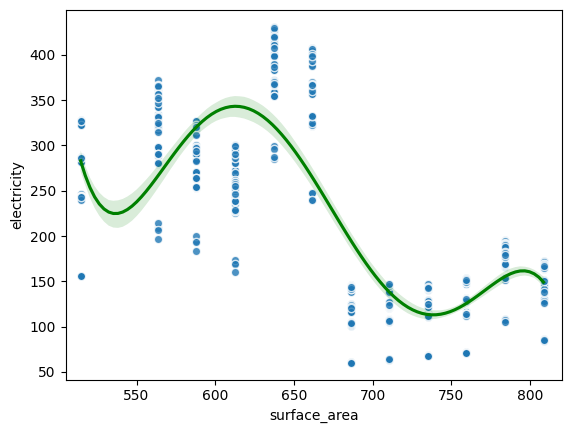

In [9]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'green'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 5)
plt.xlim(505, 820)
plt.show()

### 9차 모델 시각화

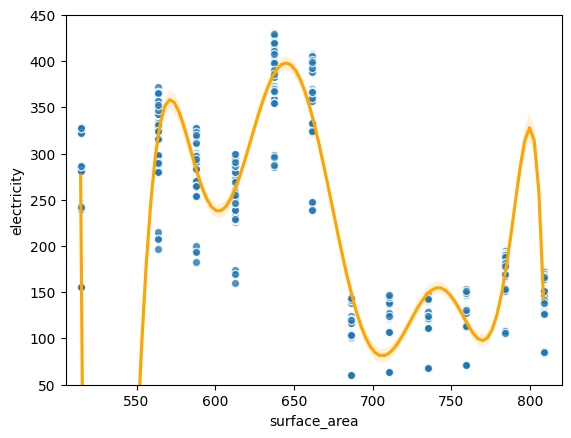

In [10]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'orange'},
            scatter_kws = {'edgecolor':'white'},
            order = 9)
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.show()

### 4개 모델 비교 시각화

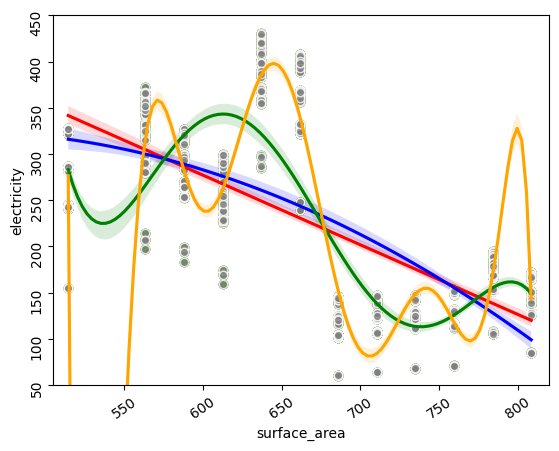

In [11]:
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'red'})
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'orange'}, order = 9,
            scatter_kws = {'color':'gray', 'edgecolor':'white'})
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

## Training Error

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


### 1차 모델 Training Error

In [14]:
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

In [15]:
# 모델 생성
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression()

In [16]:
print(Model_1.coef_) # w
print(Model_1.intercept_) # b

[-0.75387157]
729.4538243006989


In [17]:
# 예측값 생성
y_hat_1 = Model_1.predict(X_train)

len(y_hat_1)

768

In [18]:
# MSE 계산
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2)
TR_Err_1

5763.983779426341

### 5차 모델 Training Error

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5 = poly.fit_transform(X_train)

In [20]:
X_train[:3]

,surface_area
0,514.5
1,514.5
2,514.5


In [21]:
PX_5[:3]

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13]])

In [22]:
X_train.shape, PX_5.shape

((768, 1), (768, 5))

In [23]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression()

In [24]:
np.set_printoptions?

Signature:
np.set_printoptions(
    precision=None,
    threshold=None,
    edgeitems=None,
    linewidth=None,
    suppress=None,
    nanstr=None,
    infstr=None,
    formatter=None,
    sign=None,
    floatmode=None,
    *,
    legacy=None,
)
Docstring:
Set printing options.

These options determine the way floating point numbers, arrays and
other NumPy objects are displayed.

Parameters
----------
precision : int or None, optional
    Number of digits of precision for floating point output (default 8).
    May be None if `floatmode` is not `fixed`, to print as many digits as
    necessary to uniquely specify the value.
threshold : int, optional
    Total number of array elements which trigger summarization
    rather than full repr (default 1000).
    To always use the full repr without summarization, pass `sys.maxsize`.
edgeitems : int, optional
    Number of array items in summary at beginning and end of
    each dimension (default 3).
linewidth : int, optional
    The number of 

In [25]:
# precision 부동소수점 출력의 정밀도 자릿수(기본값 8)
# suppress False인 경우 과학적 표기법 사용(True인 경우 항상 고정소수점으로 부동소수점숫자 출력)
np.set_printoptions(suppress = True, precision = 40)

print(Model_5.coef_)
print(Model_5.intercept_)

[-0.0003155143830719645        -0.1029296147859151
  0.00037876136788733125       -0.0000005032062987086317
  0.00000000022980588795033472]
2906.225440478711


In [26]:
# 예측값 생성
PX_5_pred = poly.fit_transform(X_train)

y_hat_5 = Model_5.predict(PX_5_pred)

y_hat_5.shape

(768,)

In [27]:
# MSE 계산
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2)
TR_Err_5

4177.7263297191275

### 9차 모델 Training Error

In [28]:
poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)

In [29]:
X_train.shape, PX_9.shape


((768, 1), (768, 9))

In [30]:
Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression()

In [31]:
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.0000000000000000000000000479174184660863
  0.00000000000000000036206615965167506
  0.00000000000000000002141534609874219
  0.000000000000000009606888966307843
  0.000000000000003177326406207109
  0.0000000000006336691114052405
 -0.0000000000000022880589641071405
  0.0000000000000000027751494738422957
 -0.000000000000000000001127100395333196    ]
-440.08258376448225


In [32]:
PX_9_pred = poly.fit_transform(X_train)

y_hat_9 = Model_9.predict(PX_9_pred)

y_hat_9.shape

(768,)

## Testing Error

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [36]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.shape

(768, 9)

### Train_data vs. Test_data

In [37]:
# DataFrame Split
from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec, 
                                    test_size = 0.2, 
                                    random_state = 2045)

In [38]:
TR_Elec.shape, TE_Elec.shape


((614, 9), (154, 9))

### Array split

In [39]:
# Array Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], 
                                                    Elec['electricity'], 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((614, 1), (614,), (154, 1), (154,))

### Distribution visualization

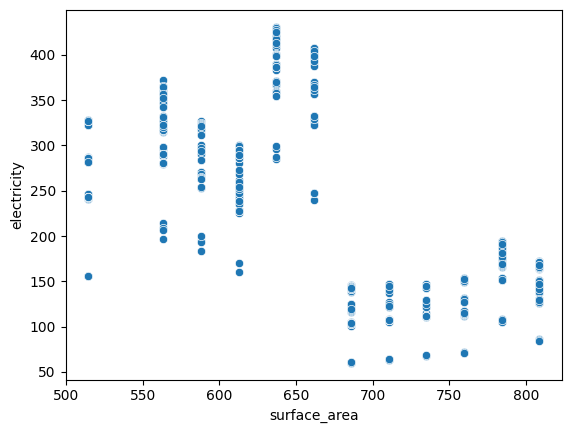

In [42]:
# train data
sns.scatterplot(x = TR_Elec['surface_area'], y = TR_Elec['electricity'])
plt.show()

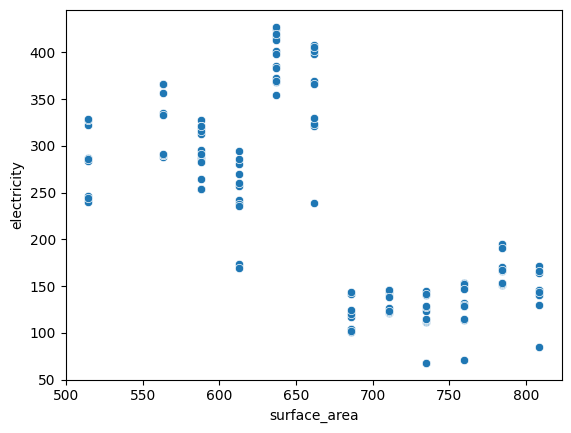

In [43]:
# test data
sns.scatterplot(x=TE_Elec['surface_area'], y = TE_Elec['electricity'])
plt.show()


In [46]:
from sklearn.metrics import mean_squared_error

In [50]:
model_order = [1, 5, 9]
model_err_list = []

for i in model_order:
    if i == 1:
        Model = LinearRegression()
        Model.fit(X_train, y_train)
        y_hat = Model.predict(X_test)
        
    else:
        poly = PolynomialFeatures(degree=i, include_bias=False)
        poly_train = poly.fit_transform(X_train)
        Model = LinearRegression()
        Model.fit(poly_train, y_train)
        y_hat = Model.predict(poly.fit_transform(X_test))

    test_err = mean_squared_error(y_test, y_hat)
    model_err_list.append(test_err)

In [51]:
for i, order in enumerate(model_order):
    print(f'{order}차 모델: {model_err_list[i]}')

1차 모델: 6044.176547629275
5차 모델: 4330.593170846333
9차 모델: 4238.689067249758


# Model Validation

In [52]:
import pandas as pd

In [53]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


### Train vs. Validation vs. Test

- 6: 2: 2 split

In [54]:
## from sklearn.model_selection import train_test_split

X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']], 
                                                      Elec['electricity'], 
                                                      test_size = int(len(Elec) * 0.2),
                                                      random_state = 2045)

print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615,)
(153, 1) (153,)


In [55]:
# 남은 80%학습데이터에서 나머지 20%(전체 길이 기준)를 또 추출
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain, 
                                                      test_size = int(len(Elec) * 0.2), 
                                                      random_state = 2045)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(462, 1) (462,)
(153, 1) (153,)
(153, 1) (153,)


### 5차 모델 Validation Error

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [57]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression()

In [58]:
PX_5_VD = poly.transform(X_valid)

y_hat_5 = Model_5.predict(PX_5_VD)

In [59]:
from sklearn.metrics import mean_squared_error

MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5

4136.482404106998

### 9차 모델 Validation Error

In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [61]:
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

In [62]:
PX9_valid = poly.transform(X_valid)

y_hat_9 = Model_9.predict(PX9_valid)

In [63]:
MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

3955.9733124593054

### 2개 모델 validation error 비교

In [64]:
print('5차 모델 MSE_5  : ', MSE_5)
print('9차 모델 MSE_9  : ', MSE_9)

5차 모델 MSE_5  :  4136.482404106998
9차 모델 MSE_9  :  3955.9733124593054


### 최종 9차 모델을 Test_Data에 적용

In [65]:
PX9_TE = poly.transform(X_test)

mean_squared_error(y_test, Model_9.predict(PX9_TE))

4220.885732081577